<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Esteban Rojas

### **Link de repositorio de GitHub:** https://github.com/esteban126/MDS7202

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

display(df.info())
display(df.describe())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

None

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


,0
Age,0
Sex,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


A simple vista parece no haber razones para realizar imputaciones al no tener nulos en ninguna de las columnas, por lo que solo bastará con escalar los datos. En este caso se utilizará el StandardScaler en todas las variables no binarias.

In [ ]:
X = df.drop("Diabetes", axis=1)
y = df["Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

In [ ]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), selector(dtype_include='number'))
    ],
    verbose_feature_names_out=False
).set_output(transform='pandas')


In [ ]:
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:00:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     11782
         1.0       0.73      0.79      0.76     11782

    accuracy                           0.75     23564
   macro avg       0.75      0.75      0.75     23564
weighted avg       0.75      0.75      0.75     23564



Los resultados de las métricas parecen decentes para un modelo que no se le han hecho grandes cambios en el dataset, obteniendo una precisión y recall sobre el 75%. El modelo tiene mayor capacidad para identificar a personas sanas (clase 0) que a personas con diabetes (clase 1).

La precisión nos revela el nivel de confianza que podemos tener en las predicciones positivas. El recall es la capacidad para reconocer todos los casos positivos. El F1-Score es un balance entre estos dos últimos. Y, finalmente, el accuracy nos evidencia las proporción de predicciones correctas.

Es importante señalar que estas métricas de clasificación solo indican que tan bien es capaz de predecir el modelo, pero no qué variables son más importantes u óptimas.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

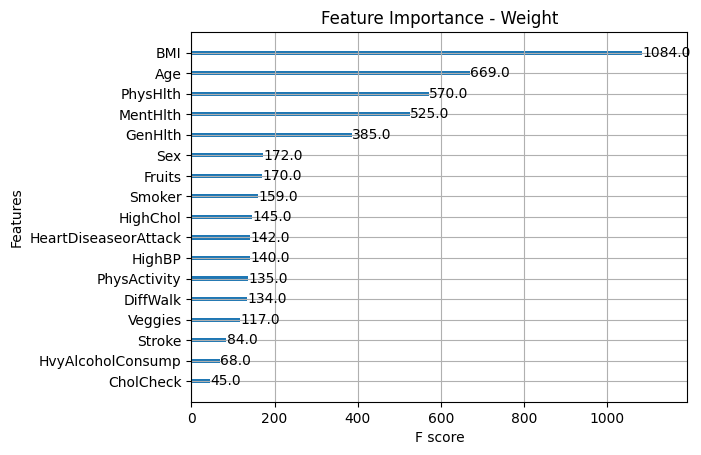

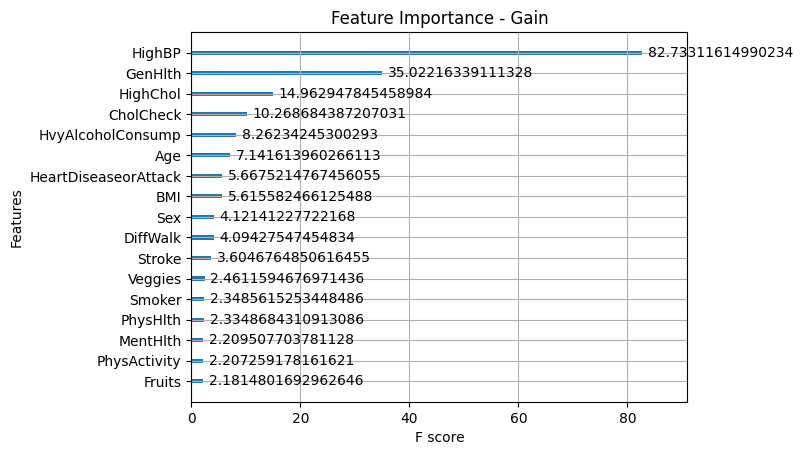

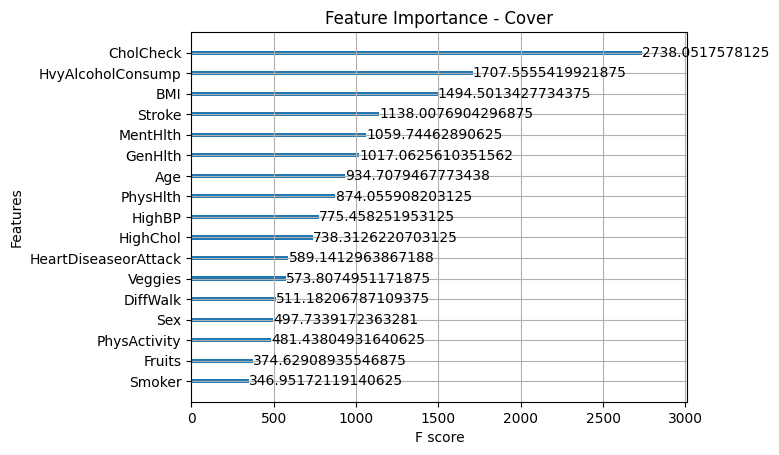

In [ ]:
from xgboost import plot_importance

# Extraer el modelo desde el pipeline
xgb_model = pipeline.named_steps['classifier']

# Plot por 'weight'
plot_importance(xgb_model, importance_type='weight', title='Feature Importance - Weight')
plt.show()

# Plot por 'gain'
plot_importance(xgb_model, importance_type='gain', title='Feature Importance - Gain')
plt.show()

# Plot por 'cover'
plot_importance(xgb_model, importance_type='cover', title='Feature Importance - Cover')
plt.show()

No necesariamente son compatibles tal como se puede observar en los plots anteriores, debido a que este método no toma en cuenta la relación entre las variables y cada una mide algo diferente.

Este método permite dar una idea general, pero no entregan una interpretación tan detallada, dado que no toma en cuenta la interacción entre variables y no verifica el valor real de las predicciones.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [ ]:
from sklearn.inspection import permutation_importance

X_test_transformed = pipeline.named_steps['preprocessing'].transform(X_test)

feature_names = pipeline.named_steps['classifier'].get_booster().feature_names

result = permutation_importance(
    pipeline.named_steps['classifier'],
    X_test_transformed,
    y_test,
    n_repeats=30,
    random_state=42,
    scoring='f1'
)

In [ ]:
perm_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance_Mean": result.importances_mean,
    "Importance_Std": result.importances_std
}).sort_values(by="Importance_Mean", ascending=False)

print(perm_df.head())

     Feature  Importance_Mean  Importance_Std
11   GenHlth         0.046919        0.001954
4        BMI         0.030492        0.002116
0        Age         0.029544        0.001536
16    HighBP         0.017318        0.001812
2   HighChol         0.012199        0.001302


Una desviación estándar alta indica que la importancia de esa feature varía mucho entre repeticiones, lo cual puede señalar inestabilidad o que su efecto depende de interacciones con otras variables.



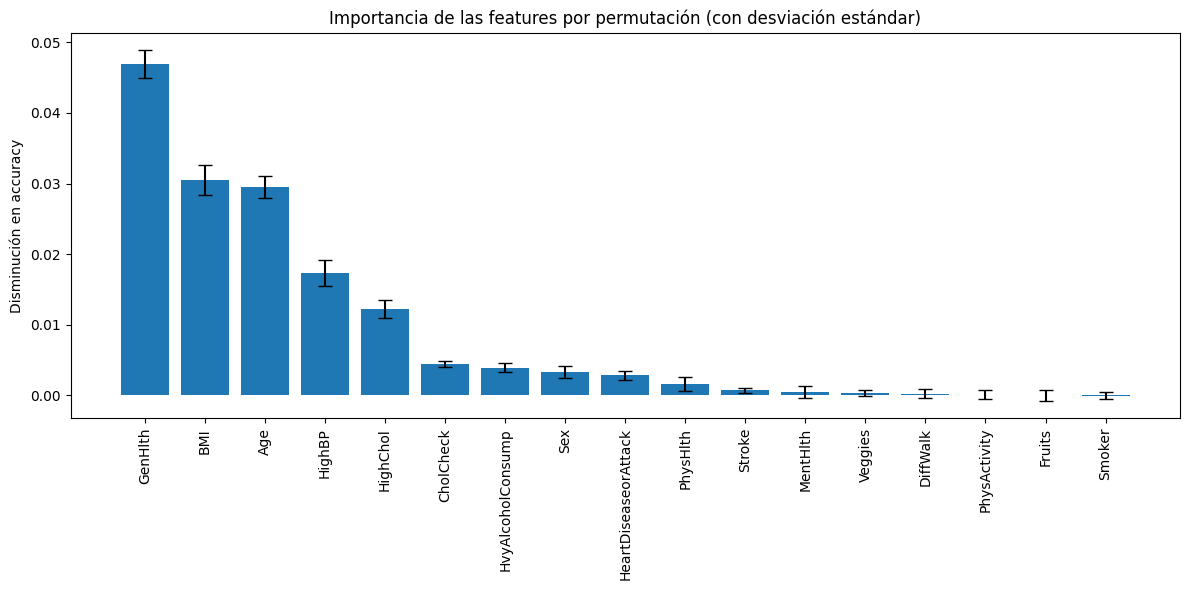

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(perm_df["Feature"], perm_df["Importance_Mean"],
        yerr=perm_df["Importance_Std"], capsize=5)
plt.xticks(rotation=90)
plt.title("Importancia de las features por permutación (con desviación estándar)")
plt.ylabel("Disminución en accuracy")
plt.tight_layout()
plt.show()

  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)

El método mide cuánto disminuye el rendimiento del modelo (accuracy) al permutar aleatoriamente una variable. Si la precisión cae mucho, significa que esa variable era importante para el modelo.

  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)

Las que tienen un mayor impacto son: GenHlth, BMI, Age, HighBP y HighChol. Por lo menos tienen sentido de acuerdo a la importancia que les asigna el modelo de XGBoost desarrollado anteriormente.

  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)

No cambían en gran medida, dado que los resultados parecen similares al punto anterior.

  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

Entre las ventajas tenemos que es de fácil interpretación, tiene alta compresión de interpretabilidad global y es comparable con diferentes modelos.Dentro de las desventajas, es que está enlazado al error del modelo; también que si las features están correlacionadas puede generar sesgos por entradas poco realistas y, finalmente, añadir una feature correlacionada puede decrecer la importancia de una feature asociada al separar la importancia en las dos features.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [ ]:
# !pip install shap

In [ ]:
import warnings
import shap
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

Cada número de los SHAP values representa la contribución individual de una variable al cambio en la predicción del modelo para un paciente específico, respecto al valor base (expected value).

Un SHAP value positivo indica que la variable contribuyó a aumentar la probabilidad de que el modelo predijera 1, es decir, que la persona tiene diabetes. En cambio un SHAP value negativo indica que la variable redujo la probabilidad.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

Paciente 1:


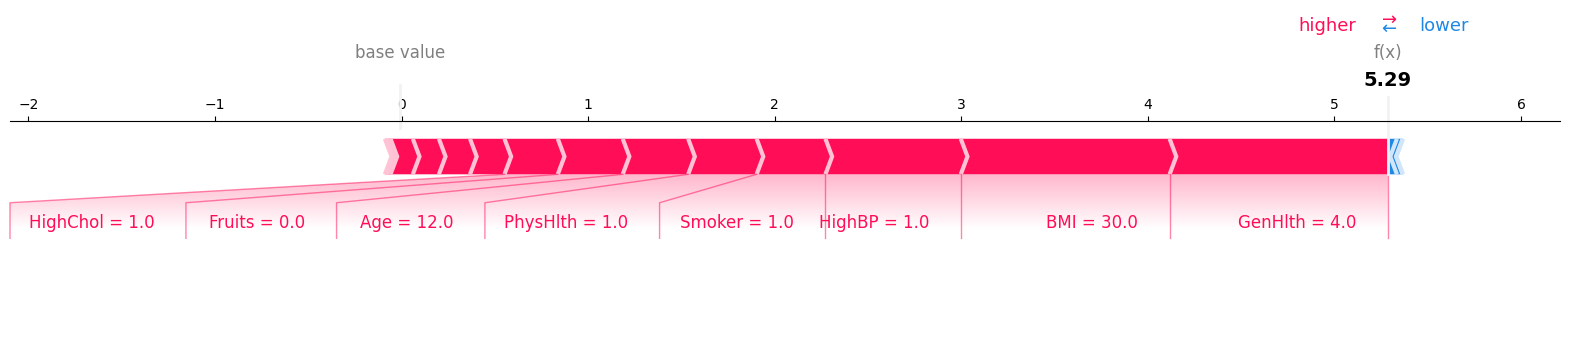

Paciente 9:


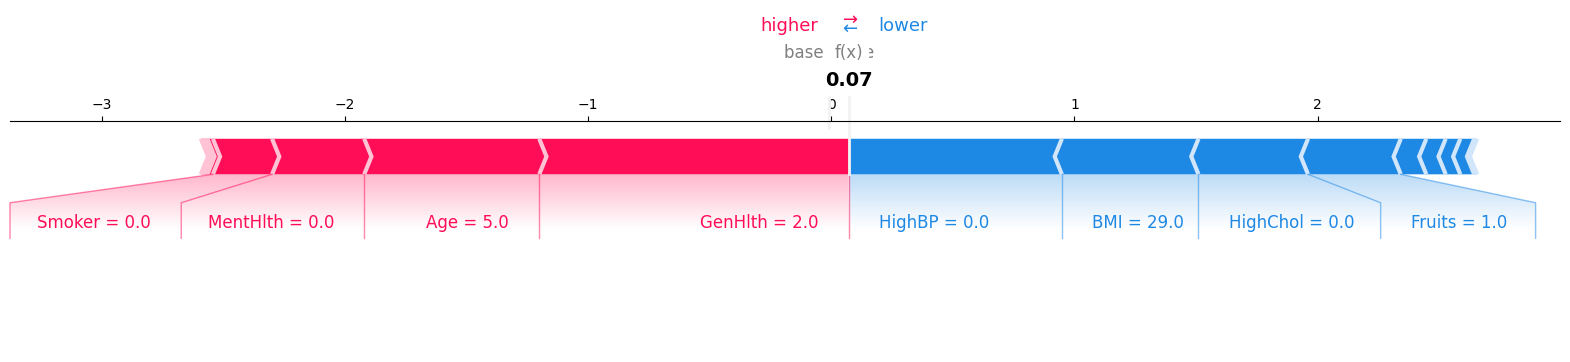

Paciente 150:


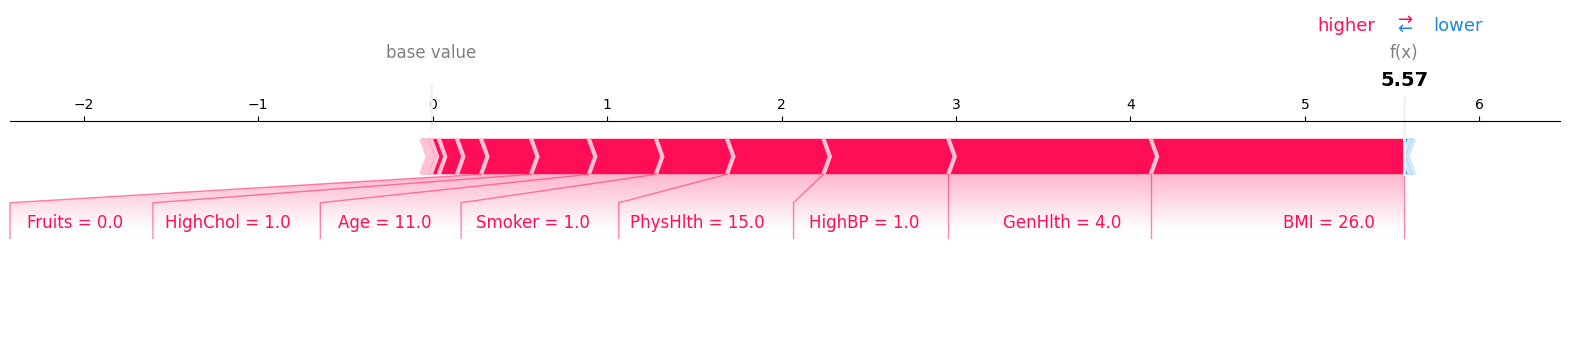

In [ ]:
indices = [1, 9, 150]

for idx in indices:
    print(f"Paciente {idx}:")
    shap.force_plot(
        explainer.expected_value,
        shap_values[idx],
        X_test.iloc[idx],
        matplotlib=True
    )

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

Parecen predominar las variables BMI, Age y GenHlth, tanto de manera positiva como negativa.

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

La edad parece ser la única variable que afecta positivamente a las 3 instancias.

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

  Considerando el tamaño del dataset y siendo una muestra muy pequeña, a lo mucho se pueden extraer ciertas ideas, pero nada que sea realmente concluyente.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

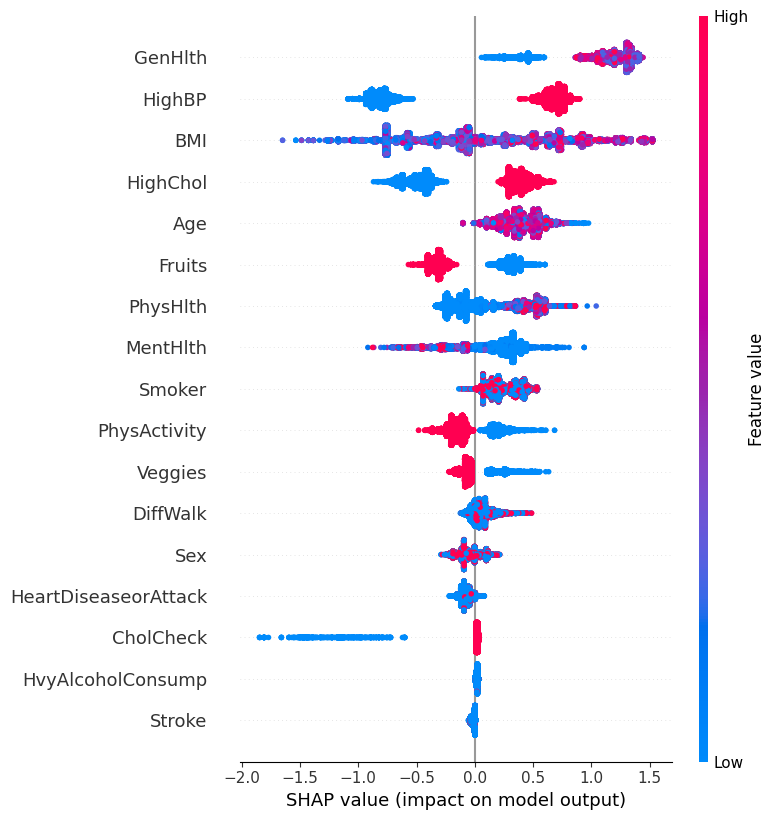

In [ ]:
shap.summary_plot(shap_values, X_test)

La mayor diferencia es que puede ver el panorama completo de gran parte del dataset, lo que permite saber con mayor claridad el aporte que genera en la detección de la clase objetivo. Por ejemplo, aquí se puede agregar que existe una tendencia del modelo a predecir de manera bastante pareja con las features "Fruits" y "PhysActivity"

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

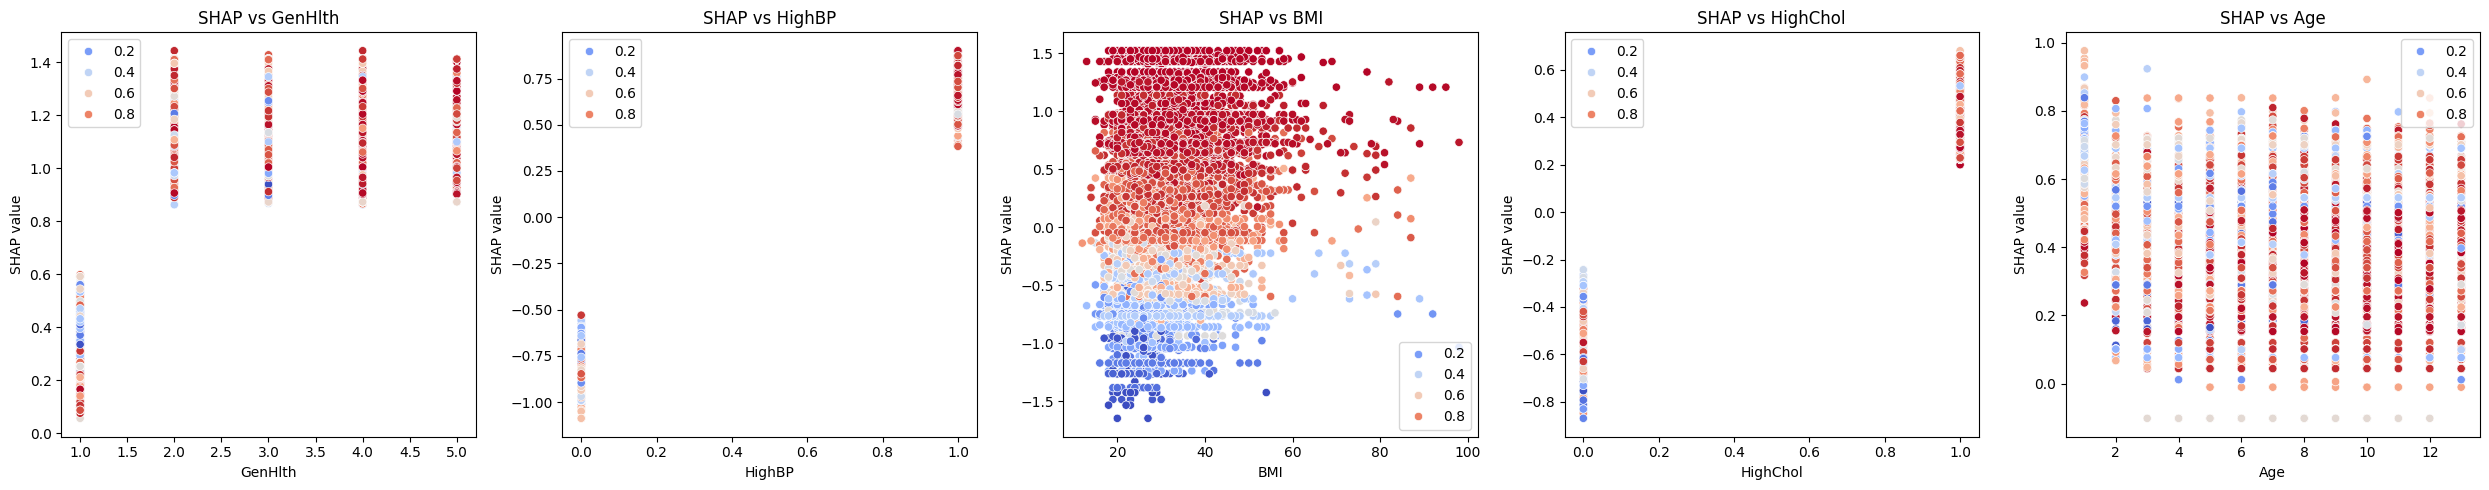

In [ ]:
probs = xgb_model.predict_proba(X_test)[:, 1]  # Probabilidad de tener diabetes

top_features = np.argsort(np.abs(shap_values).mean(axis=0))[-5:][::-1]
top_feature_names = X_test.columns[top_features]

# Graficar
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, feat in enumerate(top_feature_names):
    sns.scatterplot(
        x=X_test[feat],
        y=shap_values[:, X_test.columns.get_loc(feat)],
        hue=probs,
        palette='coolwarm',
        ax=axes[i]
    )
    axes[i].set_title(f'SHAP vs {feat}')
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel('SHAP value')

plt.tight_layout()
plt.show()


Con estos resultados se puede concluir que una variable continua como BMI le aporta bastante información al modelo, pero también le agrega una dificultad al momneto de predecir debido a su variabilidad. También, variables como GenHlth, HighBP y HighCol le permiten al modelo predecir con mayor confianza si la persona tiene diabetes o no, al observar la diferencia entre los valores SHAP por cada valor de las features. Finalmente, para la variable Age, no parece aportar demasiado al modelo, o al menos, no por sí sola, al ser tan diferentes los resultados de SHAP values.

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

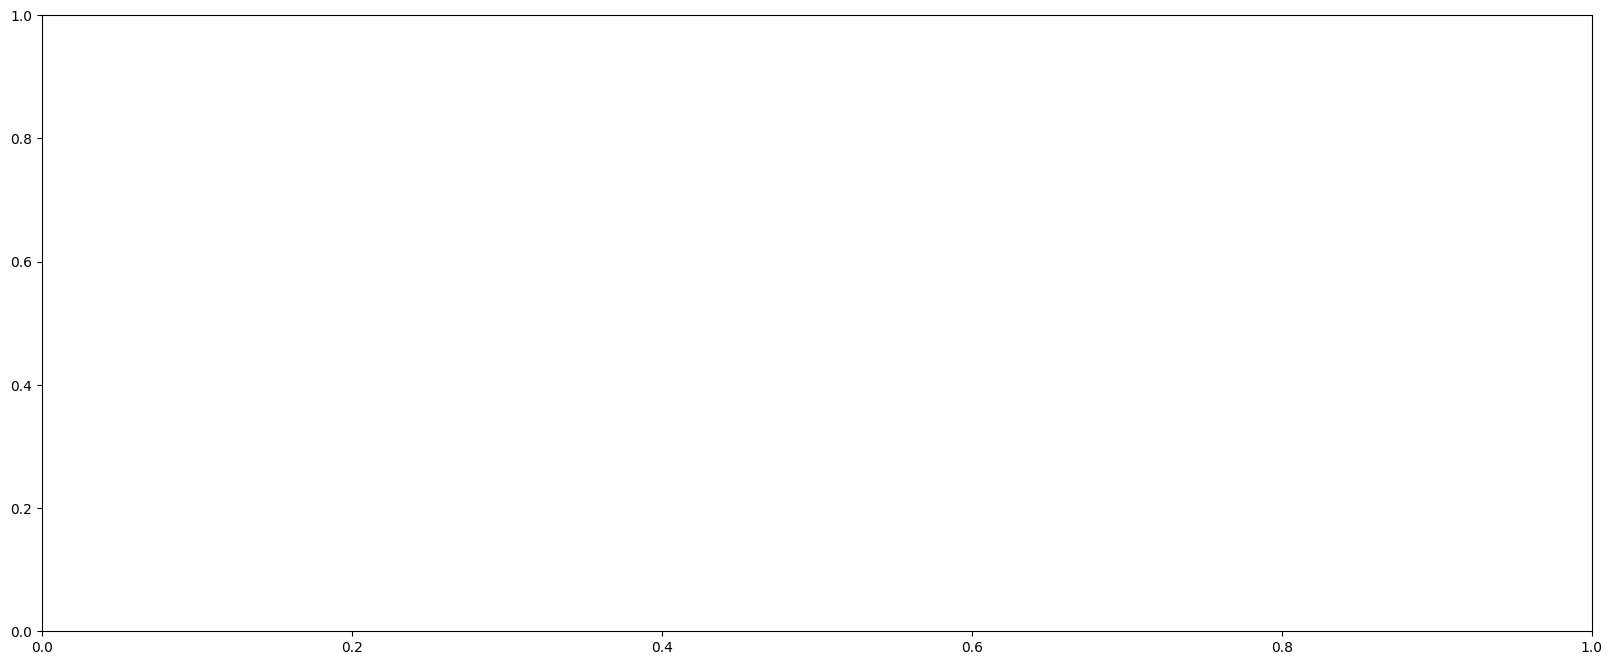

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.pipeline import make_pipeline


X_sample = X_test.sample(n=1000, random_state=42)

top_feature_names = ['HighBP', 'BMI', 'GenHlth', 'Age', 'HighChol']

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
    "response_method": "predict_proba"
}

feature_indices = [X_sample.columns.get_loc(feat) for feat in top_feature_names]


fig, ax = plt.subplots(figsize=(20, 8))
PartialDependenceDisplay.from_estimator(
    pipeline,
    X_sample,
    features=feature_indices,
    ax=ax,
    **common_params,
)
plt.tight_layout()
plt.show()

No me funcinó está sección :c

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [ ]:
# !pip uninstall -y alibi spacy thinc numpy
!pip install alibi xgboost

In [ ]:
from alibi.explainers import AnchorTabular
import numpy as np

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
predict_fn = lambda x: pipeline.predict(x)

feature_names = X.columns.tolist()
explainer = AnchorTabular(predict_fn, feature_names)

explainer.fit(X.values)

for idx in [1000, 3001, 5751]:
    explanation = explainer.explain(X.iloc[idx].values.reshape(1, -1))

    print(f"\n--- EXPLICACIÓN PARA INSTANCIA {idx} ---")
    print("Predicción del modelo:", pipeline.predict(X.iloc[idx:idx+1])[0])
    print("Regla generada:", explanation.anchor)
    print("Precisión de la regla:", explanation.precision)
    print("Cobertura (coverage):", explanation.coverage)
    print("Número de muestras usadas:", explanation.raw['n_samples'])

tampoco me funcionó :c

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

El método de SHAP values parece ser el que mejor explica el funcionamiento del modelo y la importancia con la que toma cada variable, y parece ser que el método más útil es el global, dado que genera una perspectiva más completa del dataset y la probabilidad de que cada paciente tenga diabetes o no.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>